## Exploratory Data Analysis de Pokemons
Neste arquivo será explorado algumas propriedades dos pokemons até a geração 6.

### Preparo

##### Importando bibliotecas

In [166]:
import pandas as pd
from skimage.io import imread,imshow
import numpy as np
import matplotlib.pyplot as plt

Criando variavel com caminho para a pasta que contem as imagens dos sprites dos pokemons

In [167]:
imageFolderPath="./pokemon"

##### Lendo csv

In [168]:
pokemonData = pd.read_csv("pokemon.csv")

##### Trocando N/A por - para melhor leitura

In [169]:
pokemonData.type_2 = pokemonData.type_2.fillna("-")

#### Analise de dados

Primeiras colunas de exemplo do dataset

In [170]:
pokemonData.head()

,id,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp._def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False


Descrição basica do dataset

In [171]:
pokemonData.type_1.describe()

count       800
unique       18
top       Water
freq        112
Name: type_1, dtype: object

#### Dados de tipagem
mostra abaixo a quantidade de pokemons que correspondem a cada tipagem primaria.

In [172]:
pokemonData.type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64

#### Ranking dos pokemons com tipagem primaria de grama com maior ataque

In [226]:
grassPokemon = pokemonData.loc[pokemonData.type_1=='Grass']
grassPokemonSortedByAttack = grassPokemon.sort_values(by=['attack'],ascending=False)
top10attackgrassPokemon = grassPokemonSortedByAttack.iloc[:10];

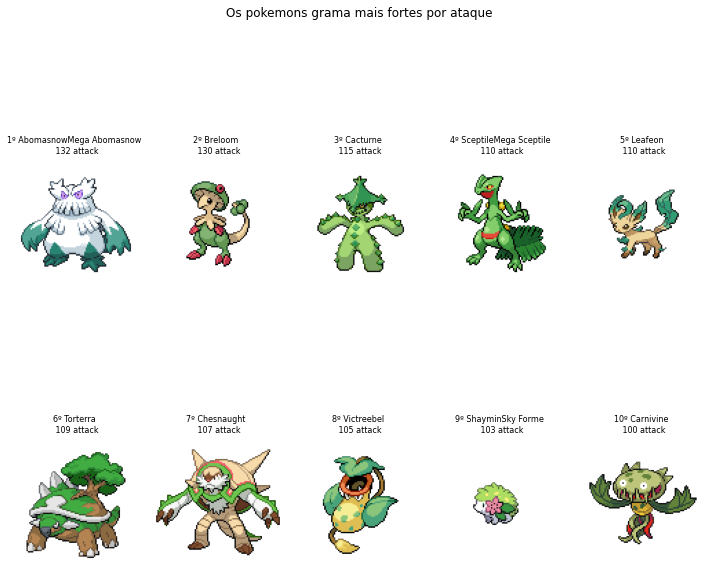

In [225]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10,10))
ax = axes.ravel()
plt.suptitle('Os pokemons grama mais fortes por ataque')

cont = 0
for index, row in top10attackgrassPokemon.iterrows():
    pokemonID = row['id']
    img = imread(f"{imageFolderPath}/{pokemonID}.png")
    ax[cont].imshow(img)
    ax[cont].set_title(f"{cont+1}º {row['name']} \n {row['attack']} attack", fontsize=8)
    cont+=1

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


Mega Abomasnow, Breloom, Cacturne, Mega Sceptile, Leafon, Torterra, Chesnaught, Victreebel, Shaymin Sky Forme e Carnivine são os pokemons com tipagem primaria grama mais fortes por ataque em ordem respectiva.